In [270]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [55]:
#loading the ipl matches dataset
ipl=pd.read_csv(r"C:\Users\AMIT\Downloads\matches.csv", encoding= 'unicode_escape')

In [57]:
ipl.shape

(756, 18)

In [59]:
ipl.info

<bound method DataFrame.info of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team

In [177]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [65]:
ipl.dropna(subset=['city'], inplace=True)
#drop null values

In [ ]:
ipl.drop(columns=['umpire 1', 'umpire 2', 'umpire 3'], inplace=True)
#to drop irrelevant cloumns

In [115]:
pd.isnull(ipl).sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [125]:
#getting the top 5 players with most man of the match awards
ipl['player_of_match'].value_counts()[0:5]

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
Name: count, dtype: int64

In [ ]:
list(ipl['player_of_match'].value_counts())[0:5]

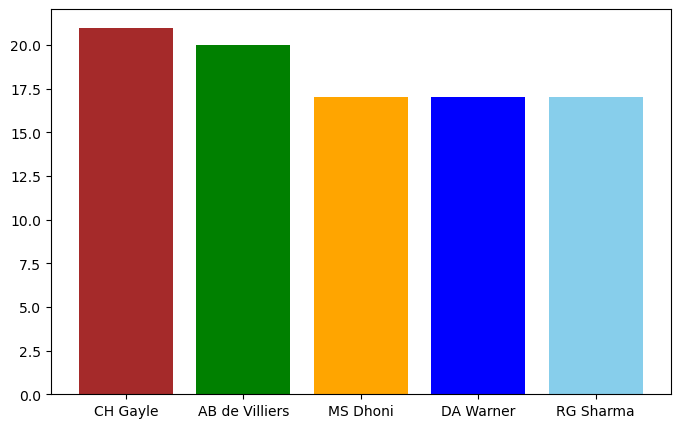

In [147]:
#making a bar-plotfor the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]),color=["brown","green","orange","blue","skyblue"])
plt.show()

In [149]:
#getting the frequency of result column
ipl['result'].value_counts()

result
normal       736
tie            9
no result      4
Name: count, dtype: int64

In [151]:
#finding out the number of toss wins w.r.t each team
ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Royal Challengers Bangalore    80
Kings XI Punjab                80
Delhi Daredevils               80
Rajasthan Royals               79
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [192]:
# Extracting the records where a team won batting first
batting_first=ipl[ipl['win_by_runs']!=0]

In [194]:
# looking at the head
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla


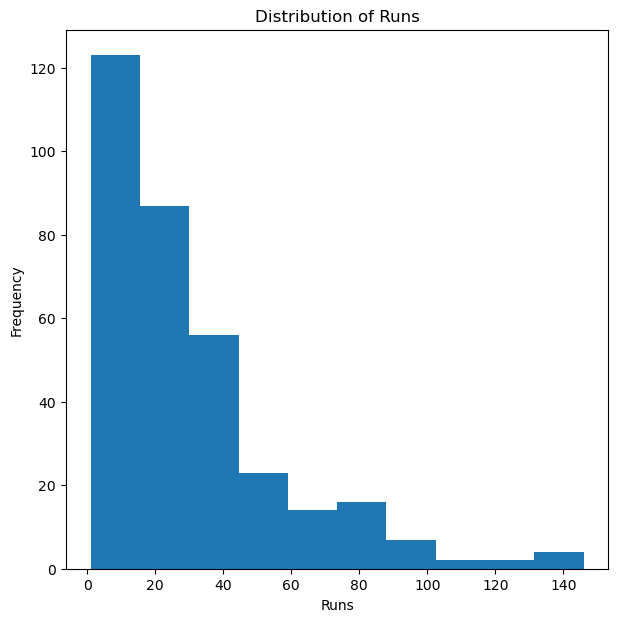

In [202]:
# making a histogram
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.title("Distribution of Runs")
plt.show()

In [206]:
# Finding out the number of wins w.r.t. each team after batting first 
batting_first['winner'].value_counts()

winner
Mumbai Indians                 57
Chennai Super Kings            51
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            28
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

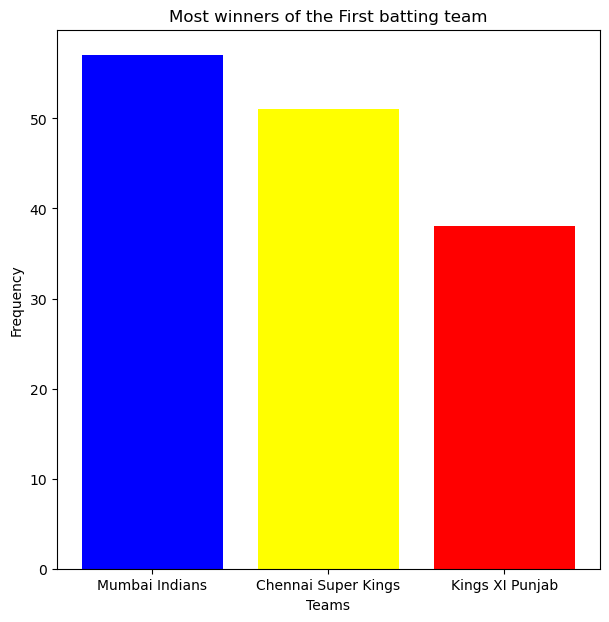

In [218]:
# Making bar plot for top 3 teams after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","red"])
plt.xlabel("Teams")
plt.ylabel("Frequency")
plt.title("Most winners of the First batting team")
plt.show

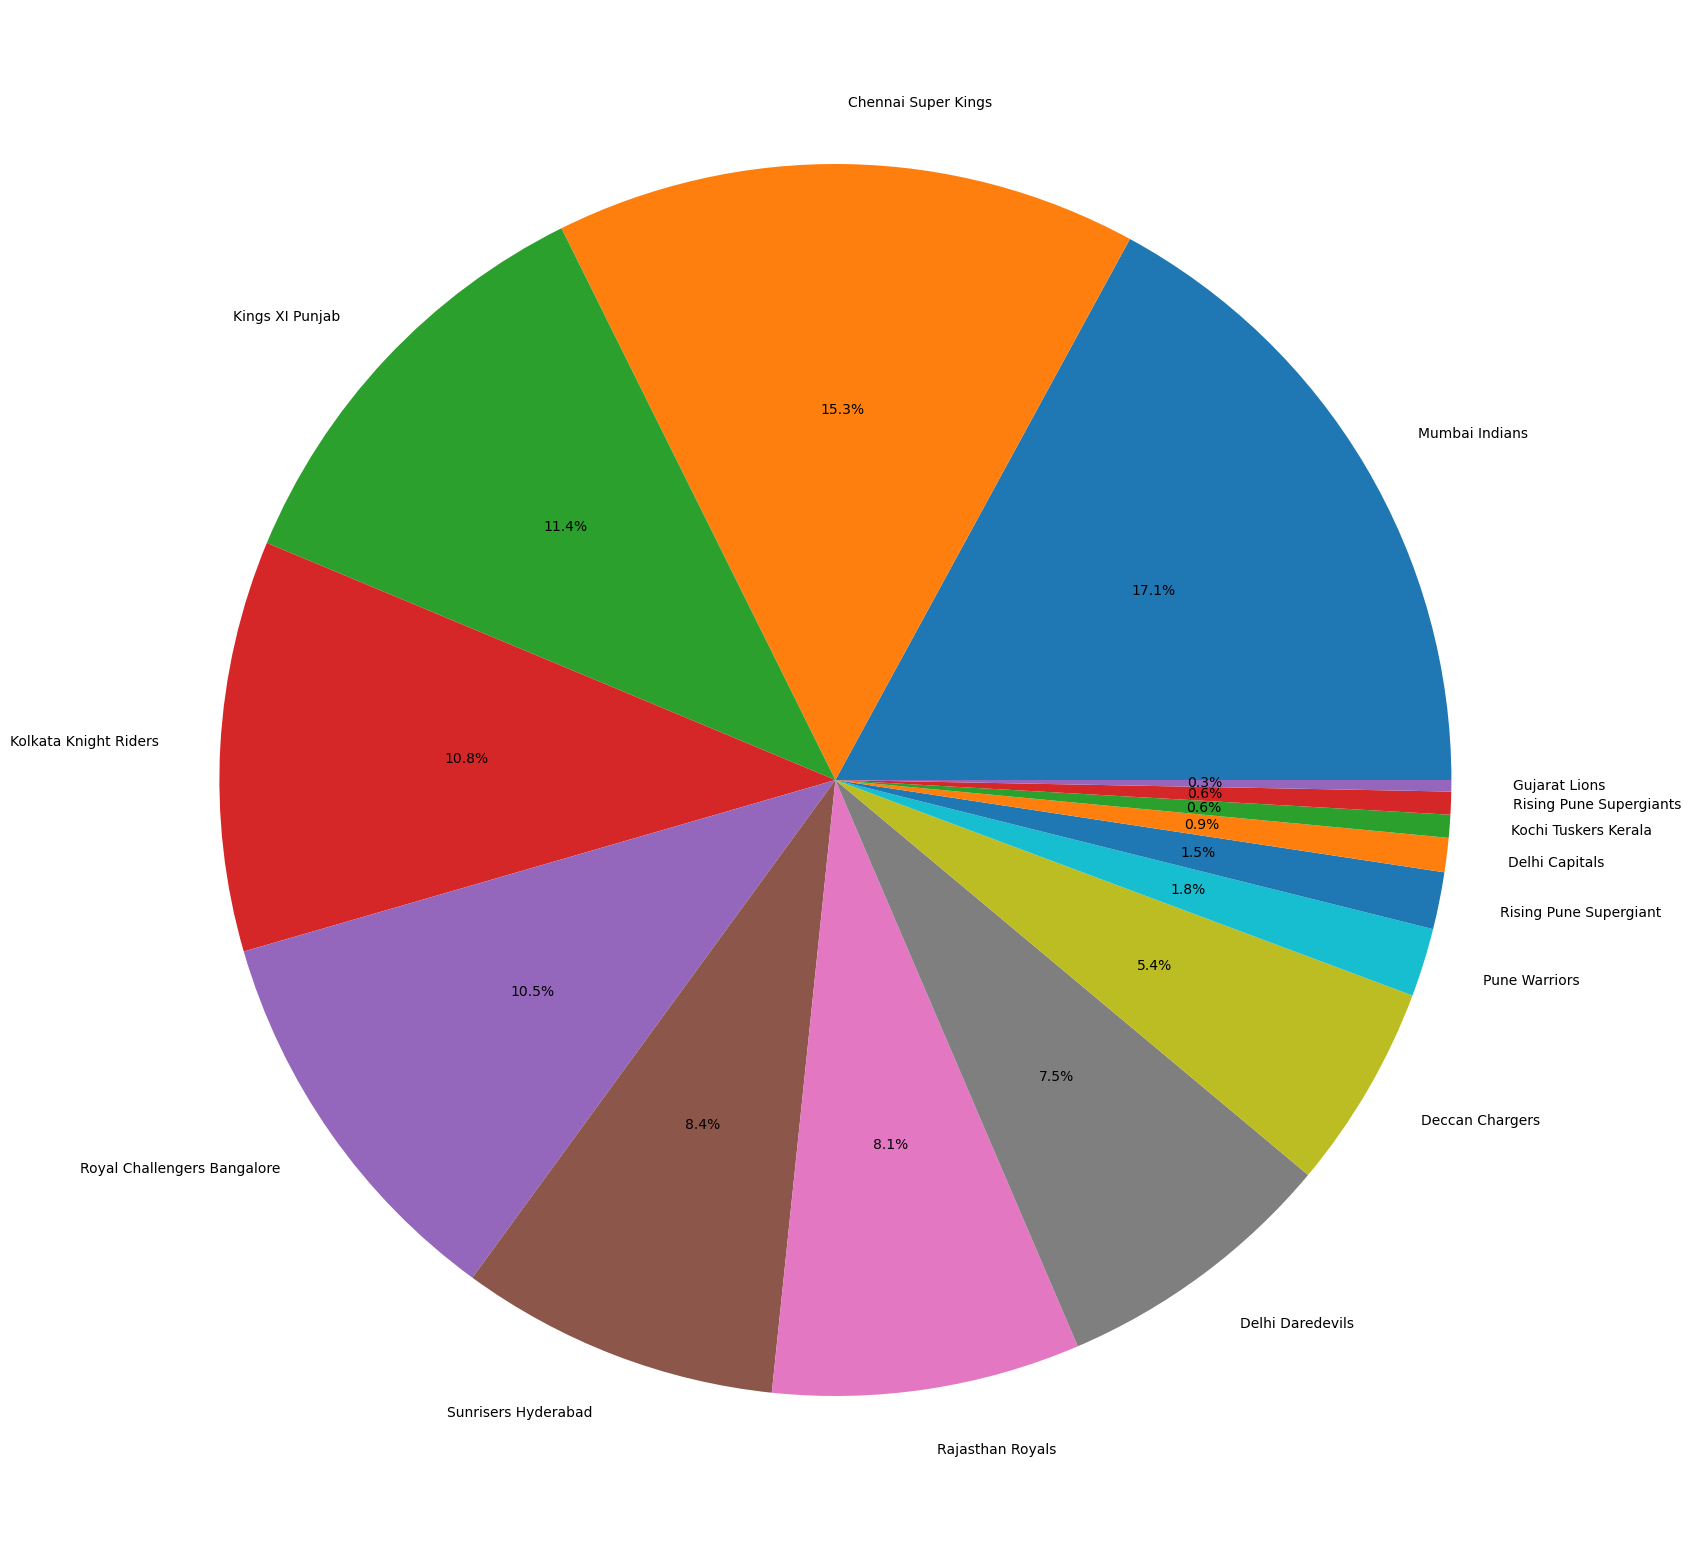

In [230]:
# making pie chart
plt.figure(figsize=(20,20))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [232]:
# extracting those records where a team has won after battnig second
batting_second=ipl[ipl['win_by_wickets']!=0]

In [234]:
# looking at the head
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium


Text(0.5, 1.0, 'Distribution of winning while second bat')

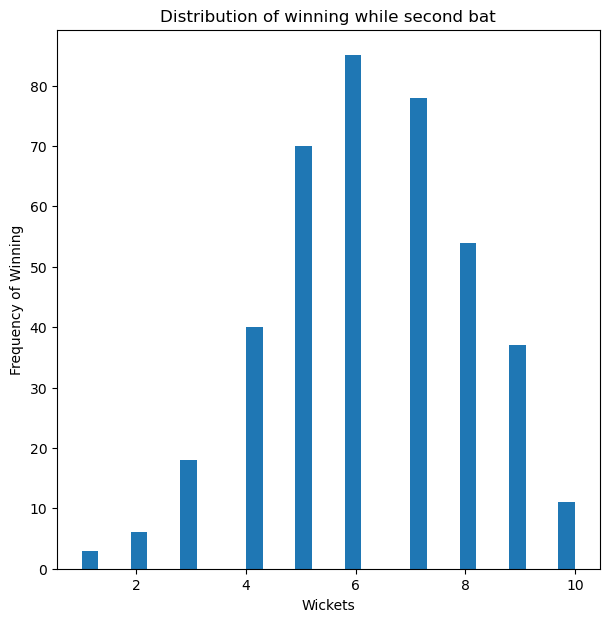

In [246]:
#creating a histogram for frequency of wins w.r.t. number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.xlabel("Wickets")
plt.ylabel("Frequency of Winning")
plt.title("Distribution of winning while second bat")

In [248]:
#finding out the frequency of number of wins w.r.t. each time after batting second 
batting_second['winner'].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    47
Chennai Super Kings            47
Rajasthan Royals               46
Kings XI Punjab                41
Delhi Daredevils               41
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

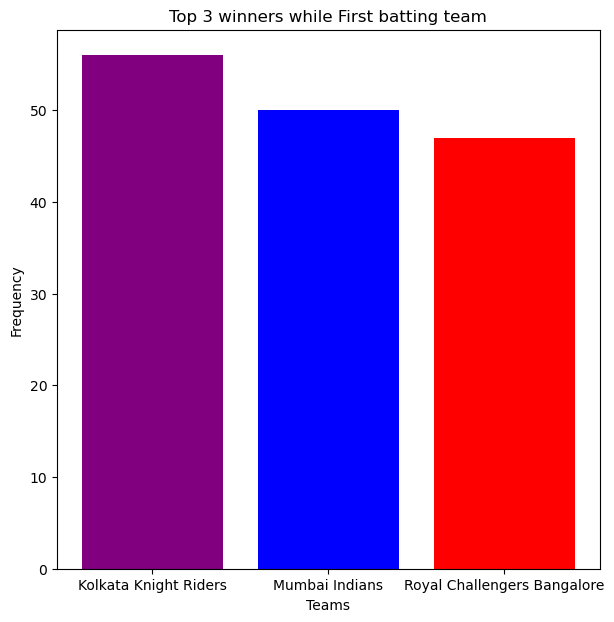

In [250]:
#creating a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","red"])
plt.xlabel("Teams")
plt.ylabel("Frequency")
plt.title("Top 3 winners while First batting team")
plt.show

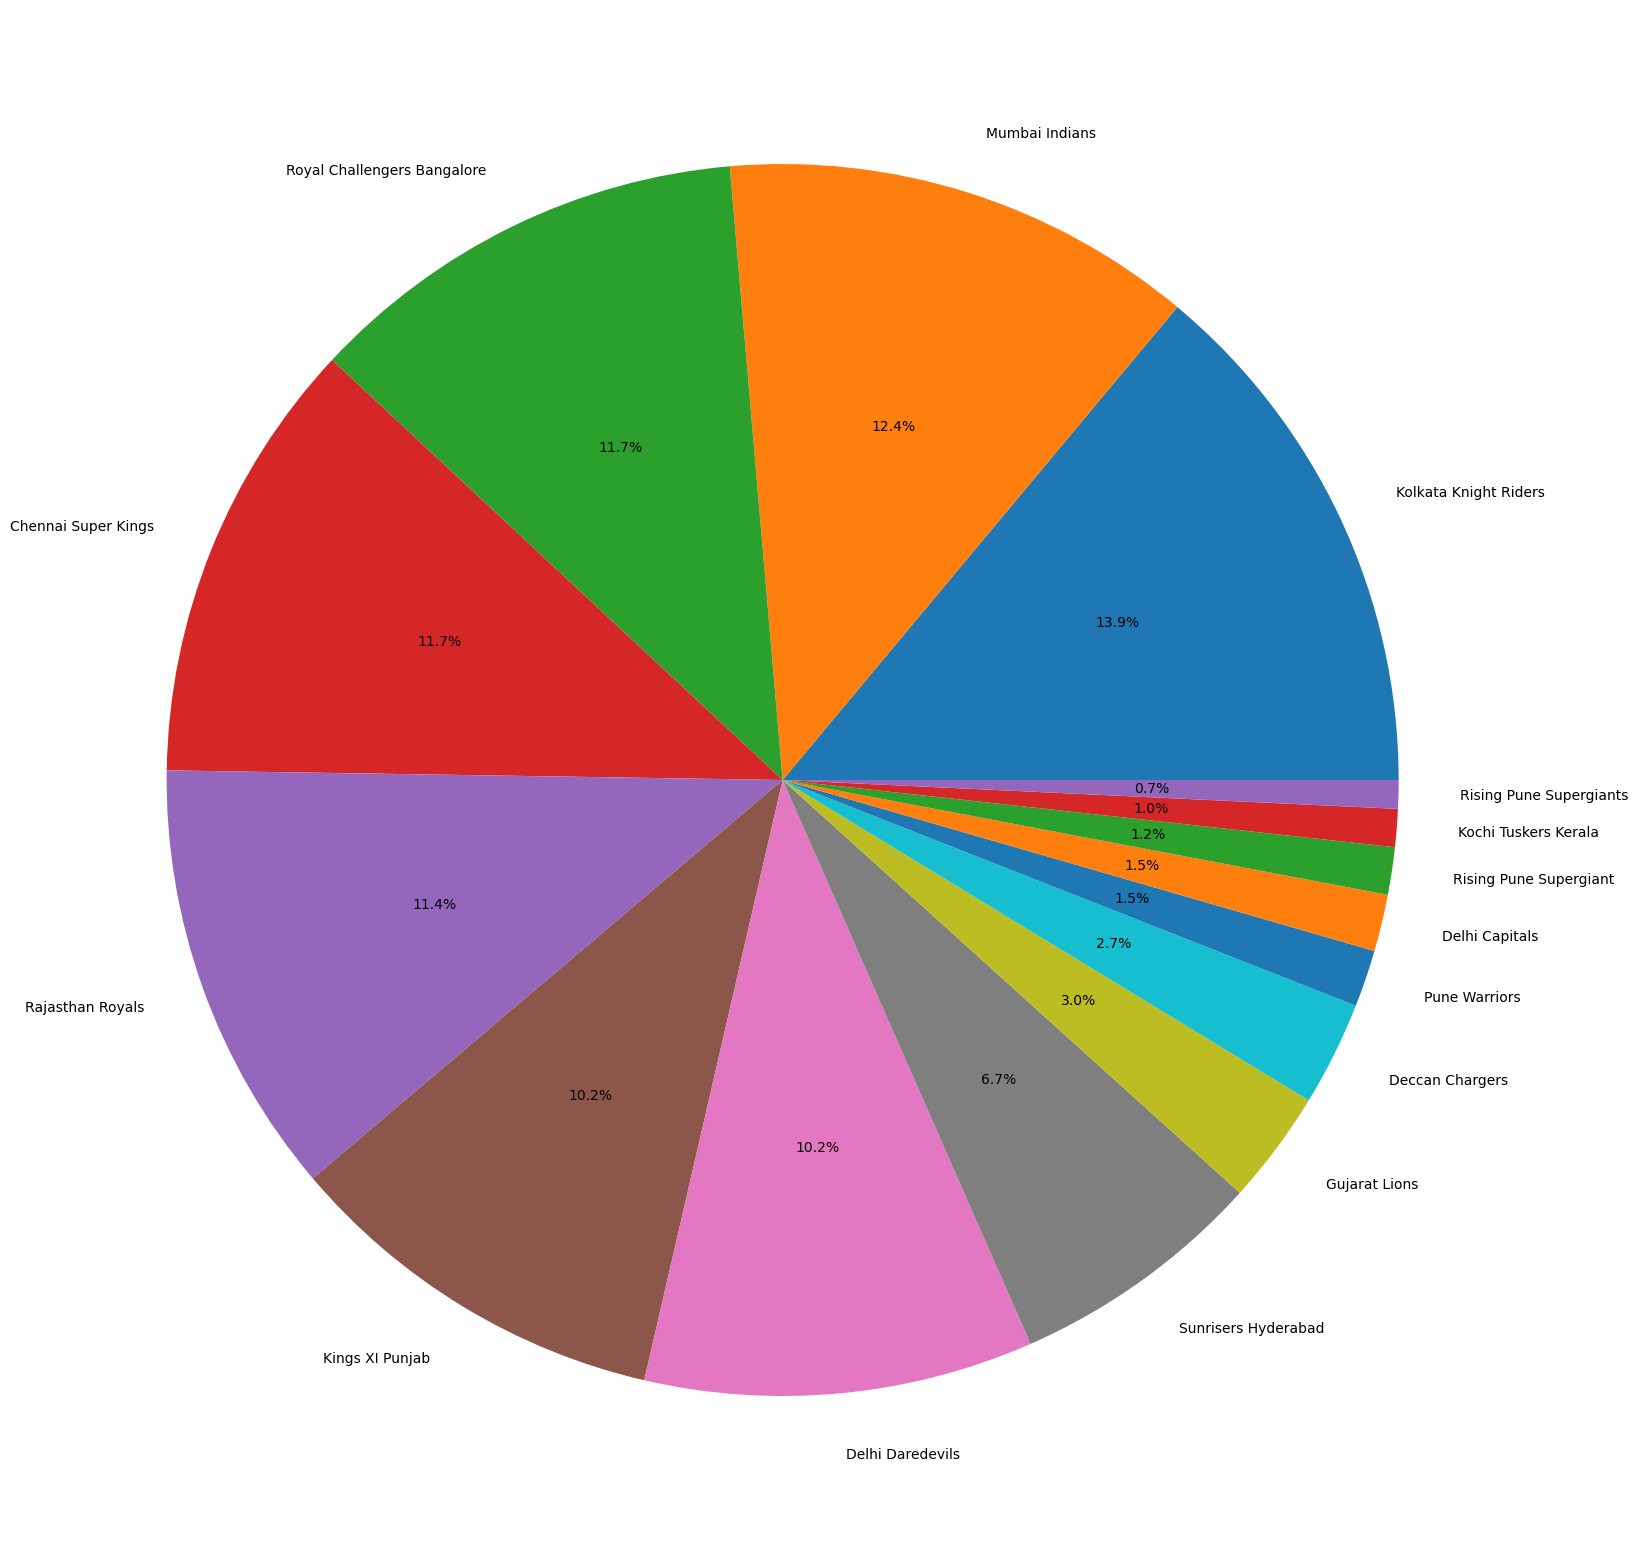

In [252]:
#creating a pie chart for distribution of most wins after batting second
plt.figure(figsize=(20,20))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [264]:
#Finding the number of matches played in each seasons
ipl['season'].value_counts()
                        

season
2013    76
2012    74
2011    73
2010    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
2014    53
Name: count, dtype: int64

In [266]:
#Finding the number of matches played in each city
ipl['city'].value_counts()
                        

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [272]:
#Finding out how many times a team has won the match after winning the toss
np.sum(ipl['toss_winner']==ipl['winner'])

390

In [ ]:
#Thank you